In [6]:
import numpy as np
import matplotlib.pyplot as plt


def find_centroid(points):
    '''
    Finds centroid from set of points
    :param points: np.array of points
    '''
    length = points.shape[0]
    sum_x = np.sum(points[:, 0])
    sum_y = np.sum(points[:, 1])
    return np.array([sum_x/length, sum_y/length])


def divide_points(points, divisions):
    '''
    Divides :param: points into sub np.arrays
    :param points: np.array of points
    :param divisions: int, number of sub np.arrays we wish to divide the original :param: points
    '''
    return np.array_split(points, divisions)


def link_points(points, ax, colour_map):
    '''
    Plots :param: points as points linked by lines on :param: ax Axes.
    The colour of the points and the lines is a 'smooth' colour transition from
    both colour extremes of the :param: colour_map
    '''
    number_of_points = points.shape[0]
    colours = [colour_map(1.*i/(number_of_points-1)) for i in range(number_of_points-1)]
    point_pairs = zip(points, points[1:]) # Creates a pairs of points (p_0, p_1), (p_1, p_2)...
    for point_pair, colour in zip(point_pairs, colours):
        numpy_point_pair = np.array(point_pair)
        ax.plot(numpy_point_pair[:, 0], numpy_point_pair[:, 1], '-o', color=colour)


def plot_trajectory_evolution_in_embedded_space(points, divisions, ax, colour_map):
    divided_points = divide_points(points, divisions=divisions)
    centroids = np.array([find_centroid(sub_points) for sub_points in divided_points])
    link_points(centroids, ax, colour_map)

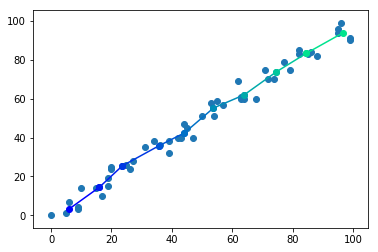

In [7]:
# Create points. You can ignore this if you want
step = 10
max_val = 100
points = np.concatenate([np.random.randint(i, i+step, size=(5, 2)) for i in range(0, max_val, step)])

# Choose colour map that has smooth transitions. Winter looks nice, but we can try with others
colour_map = plt.get_cmap('winter')

# This is the where the magic happens.
# Because we will want to plot on a subfigure, we will have to pass it as a parameter
fig = plt.figure()
ax = fig.add_subplot(111)
plot_trajectory_evolution_in_embedded_space(points, divisions=10, ax=ax, colour_map=colour_map)

ax.scatter(points[:, 0], points[:, 1])
plt.show()